# Homework 2 - Week 2 - Karthick Krishna

### Question 4.1

###### Describe a situation or problem from your job, everyday life, current events, etc., for which a clustering model would be appropriate. List some (up to 5) predictors that you might use. 

    I am an Analyst at Mindtree Limited. Currently, I work on Marketing Analytics and Ad Analytics. I work for one of the world's largest Search Engine Platforms providers on the Advertiser level data and User level data. I use Python for analysis and used the Scikit Learn package in Python. In my current project, as one of the early steps, I segregate the Customers(also known as Advertisers) into different groups before I perform Quasi-experimental design to find a treatment group for my test advertisers. After trying out lots of different clustering methods such as K-means, Partitioning Around Medoids(PAM), Hierarchical Clustering, DBSCAN, K-prototype, and K-Modes. I ended up using K-Modes since it gave good cluster separation for my dataset and I could also use Categorical data as my feature.
 

    Few of the KPI's(predictors) are as follows,

     1. The Impression gained by the advertiser using the platform (Integer datatype)
     2. Click gained by the advertiser using the platform (Integer datatype)
     3. Spend/Revenue of the Advertiser on the Platform (Doubble datatype)
     4. Vertical (Example: Travel and Transport, Retail, B2C Services, et cetera) (Categorical data)
     5. Country on the Advertiser has performed (Categorical data)

### Question 4.2

***Problem Statement: Use the R function kmeans to cluster the points as well as possible. Report the best combination of
predictors, your suggested value of k, and how well your best clustering predicts flower type.***

###### On an overall output of k =3 and using Petals as Predictors gave 96% accuracy

###### My approach to the given problem:

   The problem is very straightforward, we have to Cluster the data into k numbers. In this problem, ***After the TA call(Mr. Siawpeng Er) I've scalled my data***, I've used ggplot to identify which feature (Sepal or Petal) can get better clustering of iris Dataset followed by identifying the number of clusters using the elbow curve, later I performed k-means using the number of k that we obtain from elbow curve and feature that I select. In the end, I use the output value to find the Accuracy. 

###### My understanding of the output

    The Petal feature looks good to separate the data into k clusters, later k = 3 for the petal predictors looked good from the elbow curve. At last, the accuracy looks extremely good, i.e k-means (for the selected feature and k value) has given a good output of separating the Species into different types.

I used the following link for this question:
    1. https://rpubs.com/AnanyaDu/361293
    2. http://rstudio-pubs-static.s3.amazonaws.com/227726_134741628338405eaebcff73cc63abc6.html

In [25]:
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("tidyverse", repos='http://cran.us.r-project.org')
install.packages("cluster", repos='http://cran.us.r-project.org')
install.packages("fpc", repos='http://cran.us.r-project.org')
install.packages("factoextra", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/v-balkar.REDMOND/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/v-balkar.REDMOND/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/v-balkar.REDMOND/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/v-balkar.REDMOND/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/v-balkar.REDMOND/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


In [4]:
oldw <- getOption("warn")
options(warn = -1)
library(dplyr)
library(tidyverse)
library(cluster)
library(fpc)
library(factoextra)
require(gridExtra)
library(ggplot2)

In [189]:
# Loading the iris text dataset into a dataframe

iris <- read.table("iris.txt",header = TRUE)

In [190]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [191]:
length(unique(iris$Species))

[1] 3

In [192]:
dim(iris)

[1] 150   5

In [193]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

**Scalling the values after the TA call** 

In [196]:
normalize <- function(x){
  return ((x-min(x))/(max(x)-min(x)))
}

iris$Sepal.Length<- normalize(iris$Sepal.Length)
iris$Sepal.Width<- normalize(iris$Sepal.Width)
iris$Petal.Length<- normalize(iris$Petal.Length)
iris$Petal.Width<- normalize(iris$Petal.Width)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0.22222222,0.6250000,0.06779661,0.04166667,setosa
0.16666667,0.4166667,0.06779661,0.04166667,setosa
0.11111111,0.5000000,0.05084746,0.04166667,setosa
0.08333333,0.4583333,0.08474576,0.04166667,setosa
0.19444444,0.6666667,0.06779661,0.04166667,setosa
0.30555556,0.7916667,0.11864407,0.12500000,setosa


### Preprocessing the data

Clustering falls under Unsupervised Learning, so we don't need the output variable during execution of our algorithm. We will, therefore, remove Output variable “Species” and store it in another variable.

In [197]:
# Seperate the independent variables from the dependent variabe
df <- iris[,1:4]
df_Class <- iris[,"Species"]
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000


Now I see how different combinations have splitted.

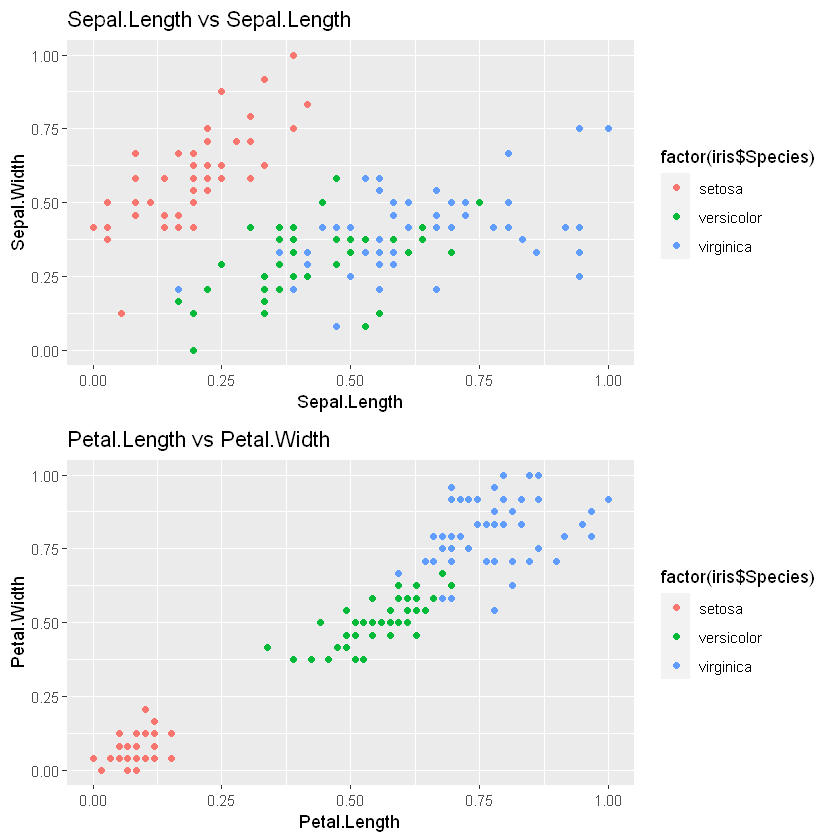

In [198]:
# plotting the petal and sepal features separately to view the different features.

plot1 <- ggplot(df, aes(x = df[,1], y = df[,2]))+geom_point(aes(color = factor(iris$Species)))+labs(x="Sepal.Length", y = "Sepal.Width", title="Sepal.Length vs Sepal.Length")

plot2 <- ggplot(df, aes(x = df[,3], y = df[,4]))+geom_point(aes(color = factor(iris$Species)))+labs(x="Petal.Length", y = "Petal.Width", title="Petal.Length vs Petal.Width")

grid.arrange(plot1, plot2, ncol=1)

# It is clear the petal features can get a better clustering of the iris dataset

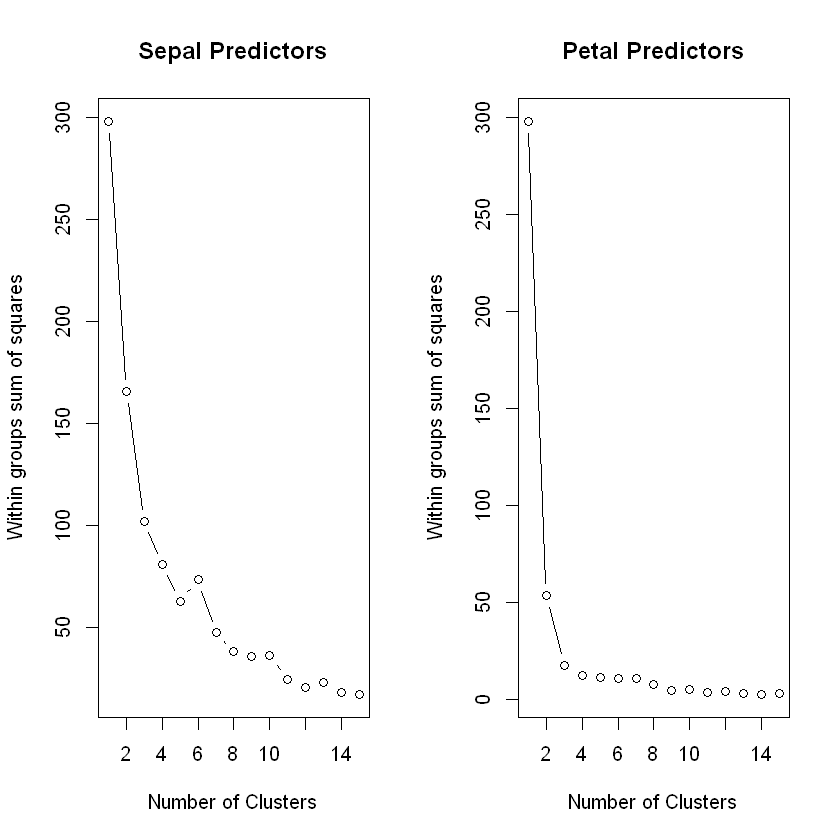

In [199]:
# For the next step, I am going to try to determine the number of clusters using the elbow method.

# FROM THE ELBOW METHOD, I am going to be using 3 clusters as input to kmeans function.

sepals_df = df[,1:2]
petals_df = df[,3:4]
par(mfrow=c(1,2))                   # used to set or query graphical parameters (Get the 2 graphs side by side)

# Elbow method on Sepals
sepals_df <- scale(sepals_df)
wss <- (nrow(sepals_df)-1)*sum(apply(sepals_df,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(sepals_df, centers=i)$withinss)
plot1 <- plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares", main="Sepal Predictors")

# Elbow method on Petals
petals_df <- scale(petals_df)
wss <- (nrow(petals_df)-1)*sum(apply(petals_df,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(petals_df, centers=i)$withinss)
plot2 <- plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares", main="Petal Predictors")

The plot above represents the variance within the clusters. It decreases as k increases, but we can see a bend or an elbow at k = 3 for the petal predictor. This bend indicates that additional clusters beyond the third have little value or not significant.

In [200]:
# ?kmeans

set.seed(123)
model <- kmeans(petals_df, 3, nstart = 25, iter.max = 10)
cluster_centroids <- aggregate(petals_df,by=list(model$cluster),FUN=mean)
cluster_centroids

Group.1,Petal.Length,Petal.Width
1,0.3048515,0.1648655
2,1.0245672,1.1242119
3,-1.3006301,-1.2507035


Showing the output graphically along with the cluster centroid

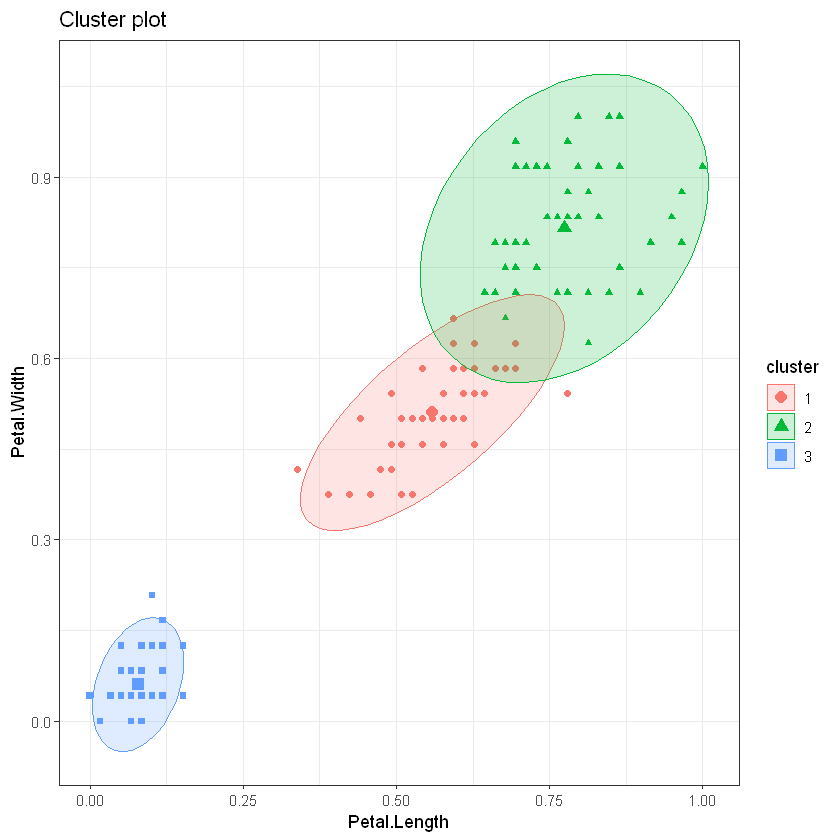

In [201]:
# ?fviz_cluster

fviz_cluster(object = model, data = df, geom = "point", choose.vars = c("Petal.Length", "Petal.Width"),
             stand = FALSE, ellipse.type = "norm") + theme_bw()

Now to check how well the model has predicted

In [202]:
model$size # gives no. of records in each cluster

[1] 52 48 50

In [203]:
table(model$cluster,df_Class)

   df_Class
    setosa versicolor virginica
  1      0         48         4
  2      0          2        46
  3     50          0         0

The above result of table shows that Cluster 1 corresponds to Virginica, Cluster 2 corresponds to Versicolor and Cluster 3 to Setosa.

Total number of correctly classified instances are: 46 + 48 + 50= 144

Total number of incorrectly classified instances are: 2 + 4= 6

Accuracy = 144/(144+6) = 0.96 meaning our model has achieved 96% accuracy

### Question 5.1

***Problem Statement: Using crime data from the file uscrime.txt, test to see whether there are any outliers in the last column (number of crimes per 100,000 people). Use the grubbs.test function in the outliers package in R.***

**Grubbs Test:**

It is a statistical test to identify Outliers. The value could be smallest or largest in the data. Grubbs test works by assuming that data is normally distributed, so we have to check the normality assumption first.

###### My approach to the given problem:

    First I checked whether my data is normally distributed or not to perform Grubbs test. Later I used grubbs.test() function to perform the test. Later I removed those values and I performed the grubb test again and checked the P-value.

###### My understanding of the output

    342 and 1993 are outliers, i.e these values are separated maximum from the mean. The p-value measures how much evidence there is that the tested point is an Outlier or not (Values Near 0 - Stronger evidence of an Outlier, Values Near 1 - Weaker evidence of an Outlier). Since I got P-value output of 1 this means the tested point should not be considered as an Outlier.
    I continued the process till the value was some what near 0
    
    That was not happening so as TA(Mr. Siawpeng Er) mentioned during the cass time if we continue to do this we will end up in removing all the data.

I used the following link for this question:
    1. rdocumentation.org/packages/outliers/versions/0.14/topics/grubbs.test
    2. https://www.youtube.com/watch?v=kc9O5XfV2pc

In [63]:
# installing the required Package
# install.packages("outliers", repos = 'http://cran.us.r-project.org')

In [64]:
crime_df <- read.table("uscrime.txt", header = TRUE)

In [65]:
head(crime_df,2)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635


In [172]:
dim(crime_df)

[1] 47 16

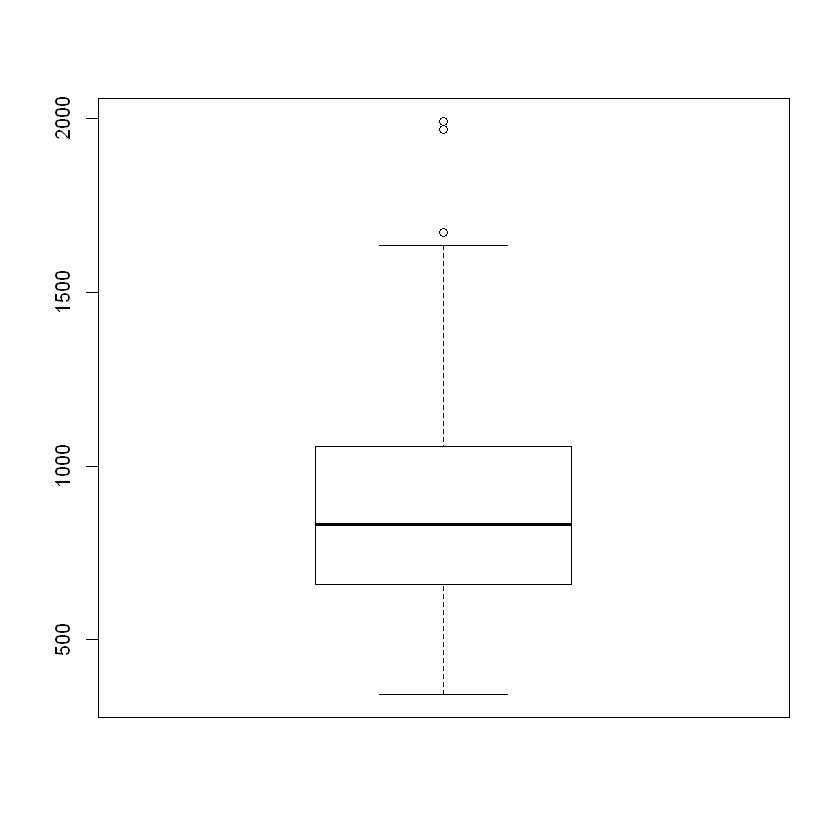

In [168]:
# Using boxplot to visualize the Outliers
boxplot(crime_df$Crime)

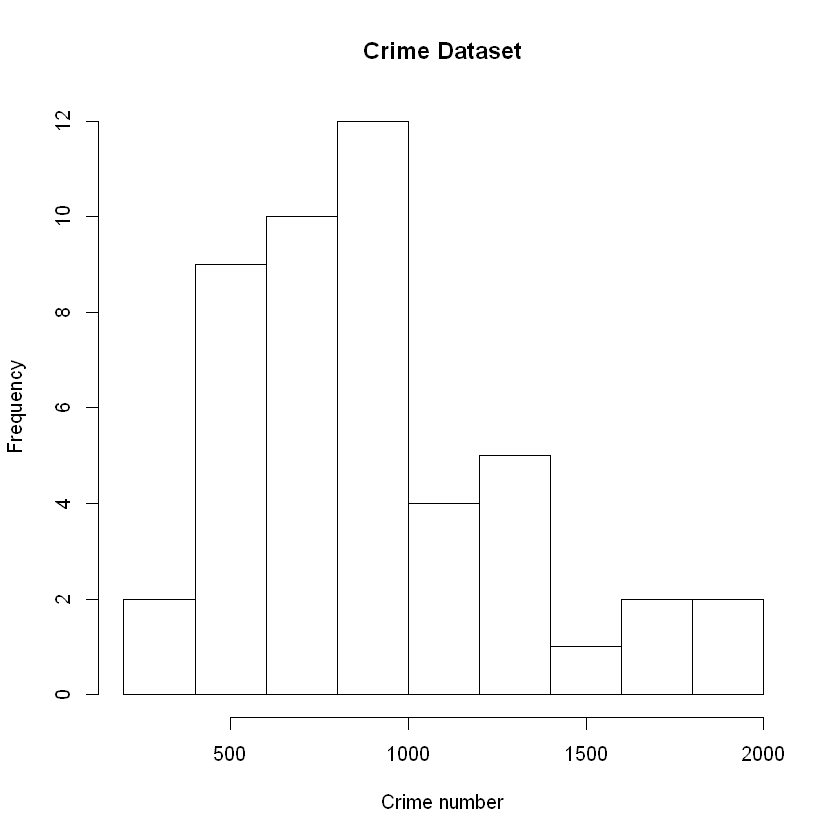

In [83]:
# Checking Normality with Histogram

hist(crime_df$Crime, xlab = "Crime number", main = "Crime Dataset")

This looks fine, but if our data had more than a single peak then Grub test cannot be used. Now I'm continueing with the grub test.

In [84]:
library(outliers)
crime <- crime_df$Crime

In [188]:
# ?grubbs.test

grubbs.test(crime, type = 11, opposite = FALSE, two.sided = FALSE)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26877, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


p-value near 1 - Weaker evidence of an Outlier

In [239]:
crime_df <- crime_df[(!(crime_df$Crime == 342) & !(crime_df$Crime == 1993)),]

In [240]:
dim(crime_df)

[1] 45 16

In [241]:
grubbs.test(crime_df$Crime, type = 11, opposite = FALSE, two.sided = FALSE)


	Grubbs test for two opposite outliers

data:  crime_df$Crime
G = 4.56671, U = 0.73301, p-value = 0.6893
alternative hypothesis: 373 and 1969 are outliers


In [242]:
crime_df <- crime_df[(!(crime_df$Crime == 373) & !(crime_df$Crime == 1969)),]

In [243]:
dim(crime_df)

[1] 43 16

In [244]:
grubbs.test(crime_df$Crime, type = 11, opposite = FALSE, two.sided = FALSE)


	Grubbs test for two opposite outliers

data:  crime_df$Crime
G = 4.03257, U = 0.78992, p-value = 1
alternative hypothesis: 439 and 1674 are outliers


**Kindly read "My understanding of the output" for this question as why I performed the process again**

### Question 6.1

**Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model would be appropriate. Applying the CUSUM technique, how would you choose the critical value and the threshold?**

   As an Analyst at Mindtree, I worked on a churn analytics project for my client where I had to analyze the Customers who tend to churn out of the system. For this I use lots of different performance metrics across a time period. One important note is that I consider the seasonality since some customers prefer to invest in the platform during a certain time of the yar. Depending on the importance of the metric, I vary the time window from weeks to months. After tabulating the time-weighted values, I compare the values to the threshold, which I decide on the data that is provided. The main objective of this project is to identify the time when the customer might leave the system, by doing so my client will get in touch with the customer and makes sure that the customer doesn't leave the system. So for this problem statement it's not definitive on selecting a Critical value or threshold.

### Question 6.2 (a)

**Problem Statement: Using July through October daily-high-temperature data for Atlanta for 1996 through 2015, use
a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts
cooling off) each year.**

First I viewed the sum and average of temperatures by year and by month to see trends,if present, in this data. 

In the Daily Temperature by Year output we want to see if climate has generally changed for the warmer as time goes on. It looks like temperature is stable throughout the years, but from 2010 there are a few abnormally with high mean temperatures. The mean temperatures for 2010 and 2011 are high.

In the Daily Temperature by Month output we want to see when we start transitioning out of summer. The output clearly explains what was expected. Starting in September temperatures start to cool down. CUSUM model would start to pick up changes as early as late August that temperatures are decreasing.

I set up a loop to run a cusum model on each individual year to determine which day start a string of temperature changes. To do this I set up a cusum model using the mean of all summer days as the center value, the standard deviation of all summer days as the target standard deviation. Detection standard deviation is set to 1.96 times the summer day standard deviation. Any value greater than 1.96 times the standard deviation will add to the cumulative sum model. 

**The dates for each year are listed in a data frame below. The earliest end of summer was 2013-08-15. The latest end of summer was 2005-10-06. Most end of summer days occur in early to mid-September.**

In [118]:
# load libraries
# if (!require(lubridate)) install.packages("lubridate")
# library(lubridate)

# if (!require(qcc)) install.packages("qcc")
# library(qcc)

# if (!require(changepoint)) install.packages("changepoint")
# library(changepoint)

# if (!require(bda)) install.packages("bda")
# library(bda)

In [97]:
# setup cusum algorithm for changes over time
temps_df = read_delim('temps.txt', delim = '\t') %>% 
        as_tibble() %>% 
        gather(year, temp, -DAY) %>% 
        mutate(year = as.factor(year),
               date = paste(DAY,year, sep = '-')) %>% 
        mutate(date_val = dmy(date),
               color = ifelse(temp > mean(.$temp), 'Above', 'Below'),
               month = month(date_val),
               day = day(date_val)) %>% 
        dplyr::select(date_val, DAY, year, temp,color, month, day)

Parsed with column specification:
cols(
  .default = col_double(),
  DAY = col_character()
)
See spec(...) for full column specifications.


In [133]:
# Truncating the data
head(temps_df)     

date_val,DAY,year,temp,color,month,day
1996-07-01,1-Jul,1996,98,Above,7,1
1996-07-02,2-Jul,1996,97,Above,7,2
1996-07-03,3-Jul,1996,97,Above,7,3
1996-07-04,4-Jul,1996,90,Above,7,4
1996-07-05,5-Jul,1996,89,Above,7,5
1996-07-06,6-Jul,1996,93,Above,7,6


In [99]:
dim(temps_df)

[1] 2460    7

In [222]:
# This is the Standard Deviation of the whole output

sd(temps_df$temp)

[1] 8.620253

In [218]:
# Group the data by year and summing it

aggregate(temps_df$temp ~ temps_df$year, temps_df, sum)

temps_df$year,temps_df$temp
1996,10297
1997,10046
1998,10364
1999,10253
2000,10336
2001,10031
2002,10281
2003,10022
2004,10057
2005,10253


In [213]:
# The mean temperaature across all the years

mean(temps_df$temp)

[1] 83.33902

In [220]:
# Group the data by months and averaging it

aggregate(temps_df$temp ~ temps_df$year, temps_df, mean)

temps_df$year,temps_df$temp
1996,83.71545
1997,81.67480
1998,84.26016
1999,83.35772
2000,84.03252
2001,81.55285
2002,83.58537
2003,81.47967
2004,81.76423
2005,83.35772


In [216]:
# Group the data by months and summing it

aggregate(temps_df$temp ~ temps_df$month, temps_df, sum)

temps_df$month,temps_df$temp
7,55025
8,54942
9,49603
10,45444


In [217]:
# Group the data by months and averaging it

aggregate(temps_df$temp ~ temps_df$month, temps_df, mean)

temps_df$month,temps_df$temp
7,88.75000
8,88.61613
9,82.67167
10,73.29677


In [226]:
## Cusum Model
# setup cusum algorithm for changes over time
temps_model_df <- read_delim('temps.txt', delim = '\t') %>% 
        as_data_frame() %>% 
        gather(year, temp, -DAY) %>% 
        mutate(year = as.factor(year),
               date = paste(DAY,year, sep = '-')) %>% 
        mutate(date_val = dmy(date),
               color = ifelse(temp > mean(.$temp), 'Above', 'Below'),
               month = month(date_val),
               day = day(date_val)) %>% 
        dplyr::select(date_val, DAY, year, temp,color, month, day)
print("Head of temp data")
head(temps_model_df)

print('Unique Years: ',)
unique(temps_model_df$year)

# grab only the summer dates for the cusum model
summer_df = temps_model_df %>% 
        filter(month %in% c(as.Date(7), as.Date(8)))

# summer_df

# determine baseline mean and sd metrics in the summer months only
summer_mean = mean(summer_df$temp)
summer_sd = sd(summer_df$temp)

# summer_mean
# summer_sd

# list of years to loop through
years = as.list(unique(as.character(temps_model_df$year)))

# years

# empty list to store values of the for loop into
store_days <- list()


# cusum for loop
for (i in seq_along(years)) {
        
        # take a year subset
        year_index <- years[[i]]
        
        df <- temps_model_df %>% 
                filter(as.character(year) == year_index) %>% 
                dplyr::select(temp)
        
        # fit a cusum model to that year
        qsum <- qcc::cusum(
                data = df$temp,
                centervalue = summer_mean, 
                std.dev = summer_sd,
                se.shift = 1.96,
                plot = F
           )
        # extract the first day that starts at least 4 consecutive days of temperature flagged by cusum model
        qsum_results <- qsum$neg %>%
                as_tibble() %>%
                rownames_to_column() %>% 
                cbind(date = temps_model_df$DAY) %>% 
                mutate( # current cusum value times the next and the fourth value cannot be 0!
                        consecutive = value * lead(value,1) * lead(value, 4) == 0
                        ) %>% 
                filter(consecutive == F) %>% 
                .[1,] %>% 
                cbind(year_index) %>% 
                dplyr::select(., -consecutive)
        
        # store the first day of a string of flagged temperatures into a list
        store_days[[i]] = qsum_results
        
}


# reduce the list of stored temperatures and format into a readable format
end_summer <- reduce(store_days, rbind) %>% 
        mutate(date = paste(date,year_index, sep = '-')) %>% 
        mutate(date_val = dmy(date)) %>% 
        dplyr::select(date_val, 'cusum_val' = value) %>% 
        mutate(year_date = year(date_val)) %>% 
        dplyr::select(year_date, date_val, cusum_val) %>% 
        mutate(month_val = month(date_val),
               day_val = day(date_val))

# end_summer


# find the earliest end of summer
earliest_end <- end_summer %>% 
        filter(month_val == min(month_val))

# earliest_end

# find the latest end of summer
latest_end <- end_summer %>% 
        filter(month_val == max(month_val))

# latest_end

# print outputs
print("Outputs:")
print(paste('Earliest Summer End: ', earliest_end$date_val))
print(paste('Latest Summer End: ', latest_end$date_val))
end_summer

Parsed with column specification:
cols(
  .default = col_double(),
  DAY = col_character()
)
See spec(...) for full column specifications.


[1] "Head of temp data"


date_val,DAY,year,temp,color,month,day
1996-07-01,1-Jul,1996,98,Above,7,1
1996-07-02,2-Jul,1996,97,Above,7,2
1996-07-03,3-Jul,1996,97,Above,7,3
1996-07-04,4-Jul,1996,90,Above,7,4
1996-07-05,5-Jul,1996,89,Above,7,5
1996-07-06,6-Jul,1996,93,Above,7,6


[1] "Unique Years: "


[1] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
[16] 2011 2012 2013 2014 2015
20 Levels: 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 ... 2015

[1] "Outputs:"
[1] "Earliest Summer End:  2013-08-15"
[1] "Latest Summer End:  2005-10-06"


year_date,date_val,cusum_val,month_val,day_val
1996,1996-09-18,-0.2128955,9,18
1997,1997-09-22,-1.4566970,9,22
1998,1998-09-29,-0.9527283,9,29
1999,1999-09-20,-2.2253764,9,20
2000,2000-09-06,-2.7836448,9,6
2001,2001-09-24,-1.6399583,9,24
2002,2002-09-24,-1.2293172,9,24
2003,2003-09-28,-0.7898293,9,28
2004,2004-09-15,-0.8492196,9,15
2005,2005-10-06,-1.3905193,10,6


### Question 6.2 (b)

**Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).**

To answer this question we will use the a cusum model to see if any year's summer days have been hotter than the overall average of the summer months. To do this we will filter the data set to only the summer months, then set up a cusum model with center value as the mean temperature of all summer months. We will use the standard deviation for the same time period. 
 

Examining the cusum plot - there is an extreme amount of positive change around the mid 2000s, with another run of hot summers following close to the end of our data set. 

**2007 looks to be the peak of the hot summers shown in the cusum chart. In particular, 8-25-2007, shows the highest cummulative sum total of any of the years summer days.**

To get the CUSUM chart I used : 
   
    1.https://cran.r-project.org/web/packages/qcc/vignettes/qcc_a_quick_tour.html
    2.http://www.stat.unipg.it/luca/misc/Rnews_2004-1-pag11-17.pdf
    3. https://rdrr.io/cran/qcc/man/qcc.html

In [227]:
# setup cusum algorithm for changes over time
temps_df2 <- read_delim('temps.txt', delim = '\t') %>% 
        as_data_frame() %>% 
        gather(year, temp, -DAY) %>% 
        mutate(year = as.factor(year),
               date = paste(DAY,year, sep = '-')) %>% 
        mutate(date_val = dmy(date),
               month = month(date_val),
               day = day(date_val)) %>% 
        filter(month %in% c(7, 8)) %>% 
        dplyr::select(date_val, DAY, year, temp)  

Parsed with column specification:
cols(
  .default = col_double(),
  DAY = col_character()
)
See spec(...) for full column specifications.


In [228]:
# center value and std.dev
summer_center2 <- mean(temps_df2$temp)
summer_sd2 <- sd(temps_df2$temp)

In [229]:
# print outputs
print(paste('Overall Summer  Mean: ', summer_center2))
print(paste('Overall Summer Standard Deviation: ', summer_sd2))

[1] "Overall Summer  Mean:  88.683064516129"
[1] "Overall Summer Standard Deviation:  4.79123867097968"


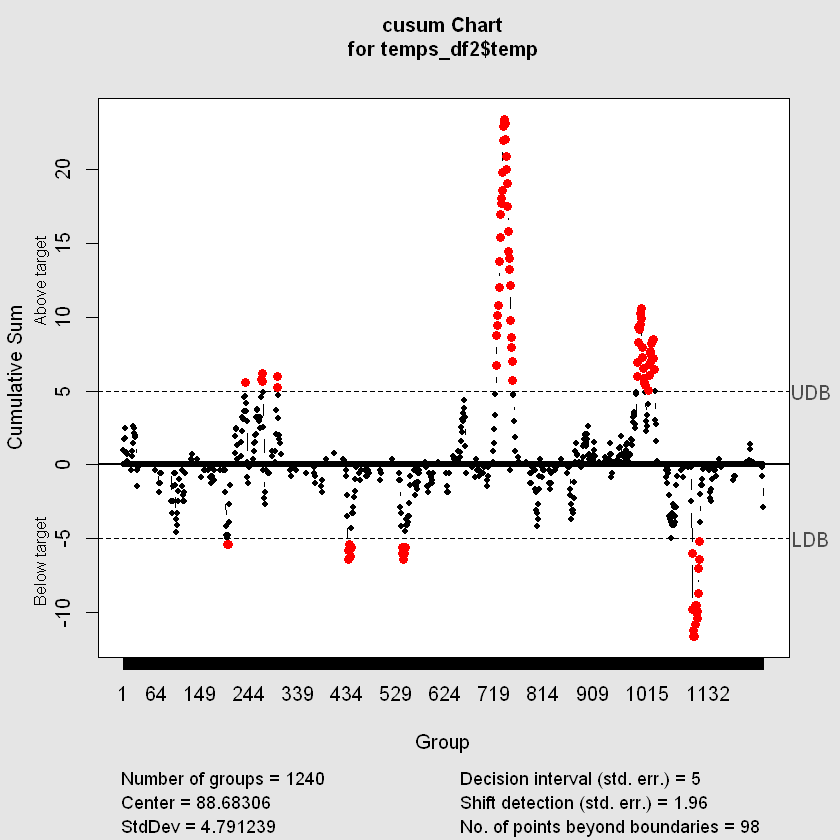

In [230]:
# plot the cusum chart for all summer days
cusum_chart <- qcc::cusum(
        data = temps_df2$temp,
        centervalue = summer_center2, 
        std.dev = summer_sd2,
        se.shift = 1.96,
        plot = T
        )

In [231]:
# extract the cusum results to see exactly when summers get hotter than normal
cusum_results <- qcc::cusum(
        data = temps_df2$temp,
        centervalue = summer_center2, 
        std.dev = summer_sd2 ,
        se.shift = 1.96,
        plot = F
        )

In [232]:
cusum_results

List of 14
 $ call             : language qcc::cusum(data = temps_df2$temp, std.dev = summer_sd2, se.shift = 1.96,      plot = F, centervalue = summer_center2)
 $ type             : chr "cusum"
 $ data.name        : chr "temps_df2$temp"
 $ data             : num [1:1240, 1] 98 97 97 90 89 93 93 91 93 93 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics       : Named num [1:1240] 98 97 97 90 89 93 93 91 93 93 ...
  ..- attr(*, "names")= chr [1:1240] "1" "2" "3" "4" ...
 $ sizes            : int [1:1240] 1 1 1 1 1 1 1 1 1 1 ...
 $ center           : num 88.7
 $ std.dev          : num 4.79
 $ pos              : num [1:1240] 0.965 1.72 2.476 1.771 0.857 ...
 $ neg              : num [1:1240] 0 0 0 0 0 0 0 0 0 0 ...
 $ head.start       : num 0
 $ decision.interval: num 5
 $ se.shift         : num 1.96
 $ violations       :List of 2
 - attr(*, "class")= chr "cusum.qcc"

In [233]:
cusum_positive <- cusum_results$pos %>%
        as_tibble() %>% 
        rownames_to_column() %>% 
        cbind(date = temps_df2$date_val) %>% 
        left_join(., temps_df2, by = c('date' = 'date_val')) %>% 
        dplyr::select(date, value, temp) %>% 
        filter(value != 0) %>% 
        arrange(date)

In [234]:
head(cusum_positive,15)

date,value,temp
1996-07-01,0.96457762,98
1996-07-02,1.72044094,97
1996-07-03,2.47630427,97
1996-07-04,1.77116753,90
1996-07-05,0.85731649,89
1996-07-06,0.77832264,93
1996-07-07,0.69932878,93
1996-07-08,0.20290634,91
1996-07-09,0.12391248,93
1996-07-10,0.04491863,93


In [235]:
highest_cusum <- cusum_positive %>% filter(value == max(value)) %>% 
        dplyr::select(date)

In [236]:
highest_cusum

date
2007-08-25


In [237]:
print(paste('Date with Highest Cusum: ', as.character(highest_cusum$date)))

[1] "Date with Highest Cusum:  2007-08-25"


In [238]:
# look at the actual temps in August 2007 - 18 days above 95 degrees!
(summer_2018 <- cusum_positive %>% 
        filter(month(date) %in% as.Date(8),
               year(date) %in% as.Date(2007))
)

date,value,temp
2007-08-03,0.1297204,94
2007-08-04,0.8855838,97
2007-08-05,1.4327328,96
2007-08-06,2.3973104,98
2007-08-07,3.3618880,98
2007-08-08,4.7438942,100
2007-08-09,6.7520433,103
2007-08-10,8.7601924,103
2007-08-11,10.1421986,100
2007-08-12,9.4370619,90
